# Statistik

Dieses Kapitel umfasst die grafische Darstellung und Analyse von empirischen Daten.

## Zufallszahlen

Obwohl streng gesprochen keine Statistik,
sind Zufallszahlen in Computerprogrammen immer wieder notwendig
und ein praktisches Hilfsmittel um diverse Statistiken zu illustrieren.

Python's internes `random` modul hat einige praktische Funktionen:

In [1]:
import random

Fließkommazahl in [0, 1)

In [2]:
random.random()

0.14040288056054673

zufällige Ganzzahl

In [3]:
random.randint(-10, 10)

10

mischen einer Liste (hier, die Zahlen von 0 bis 9)

In [4]:
x = list(range(10))
random.shuffle(x)
print(x)

[1, 7, 8, 5, 4, 3, 0, 9, 2, 6]


Gauß'sche Normalverteilung, wobei `mu` der Mittelwert und `sigma` die Standardabweichung ist.

In [5]:
random.normalvariate(mu = 1, sigma = 2)

0.599235893737404

Da Zufallszahlen in Programmen unvorhersebar sind,
jedoch mit einer deterministischen Methode berechnet werden,
gibt es die Möglichkeit den internen Status des Zufallszahlengenerators zu setzen.
Dies passiert mit der `seed` Funktion und ist für Tests oder das reproduzieren bestimmter Ergebnisse nützlich.

In [6]:
# zweimal genau dieselbe Zufallszahl!
random.seed(42)
print(random.random(), random.normalvariate(mu = 1, sigma = 2))
random.seed(42)
print(random.random(), random.normalvariate(mu = 1, sigma = 2))

0.6394267984578837 -1.2479729469788396
0.6394267984578837 -1.2479729469788396


## Abzählstatistiken

Mittels der Klasse [`Counter` in den `collections`](https://docs.python.org/2/library/collections.html#collections.Counter)
([Counter in Python 3](https://docs.python.org/3/library/collections.html#collections.Counter)) können Listen abgezählt werden.

In [7]:
from collections import Counter
from random import randint

Multipliziere 10000 mal zwei zufällig von 1 bis 4 gewählte Ganze Zahlen.
Welche Häufigkeiten gibt es und was sind die drei häufigsten Zahlen?

In [8]:
numbers = [randint(1, 4) * randint(1, 4) for i in range(10000)]
c = Counter(numbers)
c

Counter({4: 1901, 2: 1264, 8: 1261, 12: 1240, 3: 1227, 6: 1224, 16: 646, 1: 638, 9: 599})

In [9]:
c.most_common(3)

[(4, 1901), (2, 1264), (8, 1261)]

Einfaches Balkendiagramm, mit Skalierung.
Beachte, dass einige Zahlen überhaupt nicht vorkommen.

**Frage**: warum kommt die 4 am häufigsten vor?

In [10]:
for i in range(1, 17):
    print("%2d: " % i + "-" * (c[i]//30))

 1: ---------------------
 2: ------------------------------------------
 3: ----------------------------------------
 4: ---------------------------------------------------------------
 5: 
 6: ----------------------------------------
 7: 
 8: ------------------------------------------
 9: -------------------
10: 
11: 
12: -----------------------------------------
13: 
14: 
15: 
16: ---------------------


### Plot Normal-/Exponential verteilter Punkte

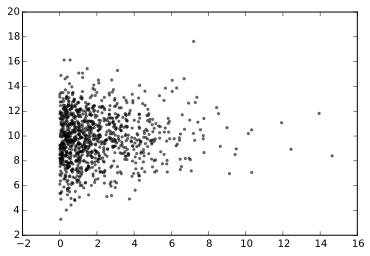

In [11]:
N = 1000 # Anzahl der Punkte
xx = [ random.expovariate(.5)      for _ in range(N)]
yy = [ random.normalvariate(10, 2) for _ in range(N)]

%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(xx, yy, marker=".", color="black", alpha=.5)

## NumPy/SciPy

Es lassen sich leicht einfache Statistiken über Arrays or Matrizen berechnen:

In [12]:
import numpy as np

In [13]:
data = np.array([
[ 3.1, 3.3, 3.2, 3.0 ],
[ 0.1, 11, 9999,    0],
[  31, -33,  11,   51],
[-5.1, -.6,   1,  9.1]
])

In [14]:
data.mean()

630.44375000000002

In [15]:
# Spaltenweise
data.mean(axis=0)

array([    7.275,    -4.825,  2503.55 ,    15.775])

In [16]:
# Zeilenweise
data.mean(axis=1)

array([  3.15000000e+00,   2.50252500e+03,   1.50000000e+01,
         1.10000000e+00])

In [17]:
data.max()

9999.0

In [18]:
# Zeilenweiser Median
np.median(data, axis=1)

array([  3.15,   5.55,  21.  ,   0.2 ])

In [19]:
# Spaltenweise die range von Minimum bis Maximum
np.ptp(data, axis=0)

array([   36.1,    44. ,  9998. ,    51. ])

In [20]:
# Standardabweichung
np.std(data, axis=1)

array([  1.11803399e-01,   4.32809417e+03,   3.11126984e+01,
         5.13176383e+00])

### Zufallszahlenarrays

NumPy liefert in [numpy.random](http://docs.scipy.org/doc/numpy/reference/routines.random.html) eine Fülle von Funktionen für das effiziente Sampeln verschiedener Verteilungen in Arrays.

Die vorhergehenden `xx` und `yy` listen lassen sich viel effizienter als NumPy Vektoren erzeugen:

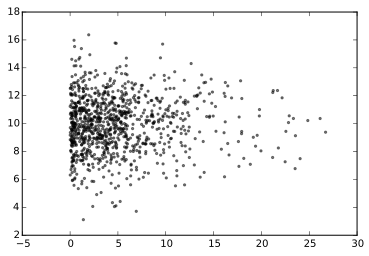

In [21]:
xx = np.random.exponential(scale = 5, size = N)
yy = 10 + 2 * np.random.randn(N)
plt.scatter(xx, yy, color="black", marker=".", alpha=.5)

SciPy beinhaltet in [scipy.stats](http://docs.scipy.org/doc/scipy-dev/reference/stats.html) eine Sammlung von statistischen Verteilungen, Methoden und Tests.
Viele alltägliche Anwendungen sind damit abgedeckt.

Das allgemeine Schema ist hierbei so,
dass für jede der diskreten oder kontinuierlichen Verteilungen jeweils eine Liste bestimmter Funktionen implementiert sind.

* `pdf` und `cdf` sind beispielsweise die Dichte- und kumulierten Dichteverteilungen,
* `rvs` zum Sampeln zufälliger Werte,
* und schließlich `fit` zum Anpassen an gegebene Daten und
* `stats` für generelle Daten über die Verteilung.

In [22]:
import scipy.stats as sps

10 Bernulli-verteilte Zahlen, mit Wahrscheinlichkeitsparameter `p = 0.2`:

In [23]:
sps.bernoulli.rvs(.2, size = 10)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

Rekonstruktion unserer Parameter der Normalverteilung (siehe `yy` oben)

In [24]:
sps.norm.fit(yy)

(9.9588089953732553, 1.9748888491992387)

Es gibt in `scipy.stats` auch eine Reihe von statistischen Funktionen und Tests.
Beispielsweise gibt es den berühmten [T-Test](http://en.wikipedia.org/wiki/Student's_t-test),
um herauszufinden ob zwei unterschiedliche Samples den gleichen Mittelwert haben.

## Sierpinsky Dreieck

Als visuelles Ergebnis eines Zufallsprozesses.

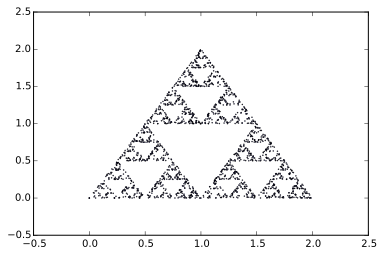

In [25]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

N = 2000
edges = np.array([[0, 0], [2, 0], [1, 2]], dtype=np.float)
sierp = np.empty((N, 2))
point = edges[0]

for i in range(3, N):
    edge = edges[random.randint(0, 2)]
    point = (point + edge) / 2
    sierp[i] = point

plt.scatter(*sierp.T, s=1, marker=".", c="b")

### (Welch's) T-Test

`male` und `female` sind (halbwegs normalverteilte) Prüfungsergebnisse.
Gibt es einen signifikanten Unterschied?
Die $H_0$ [Nullhypothese](http://en.wikipedia.org/wiki/Null_hypothesis) wäre, dass die Mittelwerte gleich sind.
Die Ergebnisse des Tests liegen aber über der 1% bzw. 5% Schranke ($\sim 55.2\%$)
und daher kann die Nullhypothese nicht verworfen werden.
In der Tat sind die Mittelwerte jedoch nicht gleich,
jedoch kann der Test dies aufgrund der kleinen Datenmenge bzw. großen Streuung dies nicht erkennen.

In [26]:
male = [3, 4, 1, 2, 2, 1, 3, 4, 2, 3, 2, 3, 3, 4, 4, 3, 3, 5, 1, 4,
        2, 3, 3, 2, 1, 5, 3, 3, 1, 2]
female = [3, 3, 2, 3, 4, 3, 1, 4, 1, 2, 1, 3, 2, 3, 4, 1, 3, 3, 3, 2]

In [27]:
np.mean(male), np.std(male), np.median(male)

(2.7333333333333334, 1.1234866364235143, 3.0)

In [28]:
np.mean(female), np.std(female), np.median(female)

(2.5499999999999998, 0.97339611669658921, 3.0)

In [29]:
sps.ttest_ind(male, female, equal_var = False)

(0.59990642797746641, 0.55161451342571177)

## Statsmodels

Eine mächtigere Bibliothek für statistische Modellierung und Rechnung ist [Statsmodels](http://statsmodels.sourceforge.net/).